In [1]:
# TODO:
# r_squered fix

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

## Import data and data preprocessing

In [3]:
name = 'Hrshtik'
data = pd.read_csv(name+'.csv')
print(data.info())
print(data.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458483 entries, 0 to 458482
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   458483 non-null  int64  
 1   phenomenon  458483 non-null  object 
 2   value       458483 non-null  float64
 3   logged_at   458483 non-null  object 
 4   value_text  0 non-null       float64
dtypes: float64(2), int64(1), object(2)
memory usage: 17.5+ MB
None
<bound method NDFrame.describe of         device_id        phenomenon     value            logged_at  value_text
0           24169       temperature    0.8000  2024-02-10 16:15:00         NaN
1           24169          pressure  989.3600  2024-02-10 16:15:00         NaN
2           24169  formaldehyde_ppb    0.0000  2024-02-10 16:15:00         NaN
3           24169   formaldehyde_ug    0.0000  2024-02-10 16:15:00         NaN
4           24169          tvoc_ppb    0.0000  2024-02-10 16:15:00         NaN
...           ...   

In [4]:
## convert phenomenons as columns

# data.groupby('phenomenon').apply(list).apply(pd.Series).T
data = data.pivot_table(index=['device_id', 'logged_at'], columns='phenomenon', values='value').reset_index()
data

phenomenon  device_id            logged_at    co2_mg  co2_ppm  co_ppb  \
0               24169  2024-02-10 16:15:00  855.6167   447.20    0.00   
1               24169  2024-02-10 16:30:00  849.5286   444.00    0.00   
2               24169  2024-02-10 16:45:00  854.1033   446.40    0.00   
3               24169  2024-02-10 17:00:00  862.1393   450.60    0.00   
4               24169  2024-02-10 17:15:00  849.4402   443.90    0.00   
...               ...                  ...       ...      ...     ...   
15809           24169  2024-09-14 14:30:00  737.1951   424.86  554.12   
15810           24169  2024-09-14 14:45:00  734.1824   423.10  556.98   
15811           24169  2024-09-14 15:00:00  729.8044   420.62  556.22   
15812           24169  2024-09-14 15:15:00  728.1887   419.71  560.37   
15813           24169  2024-09-14 15:30:00  725.1372   418.00  562.02   

phenomenon     co_ug  formaldehyde_ppb  formaldehyde_ug  h2s_ppb   h2s_ug  \
0             0.0000              0.00           0.0000    20.84  30.8762   
1             0.0000              0.00           0.0000    21.67  32.1072   
2             0.0000              0.00           0.0000    21.67  32.1065   
3             0.0000              0.00           0.0000    22.39  33.1733   
4             0.0000              0.00           0.0000    21.74  32.2148   
...              ...               ...              ...      ...      ...   
15809       611.9306             82.30          97.4439    56.99  76.5744   
15810       615.1235             82.30          97.4494    56.67  76.1487   
15811       614.2214             82.30          97.4395    58.03  77.9682   
15812       618.7729             81.29          96.2388    57.21  76.8626   
15813       620.5224             82.30          97.4232    57.87  77.7402   

phenomenon  ...    pm1   pm10  pm100   pm25  pressure  so2_ppb   so2_ug  \
0           ...  13.70  12.90  13.10  12.30    989.36     5.07  14.1209   
1           ...  13.90  13.40  13.60  12.70    989.40     4.36  12.1439   
2           ...  16.30  15.40  15.60  14.80    989.38     4.96  13.8148   
3           ...  16.70  15.60  15.80  15.10    989.38     4.28  11.9208   
4           ...  16.80  15.70  15.90  15.20    989.52     4.46  12.4239   
...         ...    ...    ...    ...    ...       ...      ...      ...   
15809       ...   8.74  18.33  21.00   9.97    989.40     0.00   0.0000   
15810       ...   8.64  18.60  22.20   9.70    989.39     0.00   0.0000   
15811       ...   8.45  18.33  23.11   9.75    989.42     0.00   0.0000   
15812       ...   8.45  18.11  22.33   9.75    989.37     0.00   0.0000   
15813       ...   8.45  17.78  21.56   9.75    989.32     0.00   0.0000   

phenomenon  temperature  tvoc_ppb    uv  
0                  0.80       0.0  0.00  
1                  0.80       0.0  0.00  
2                  0.80       0.0  0.00  
3                  0.80       0.0  0.00  
4                  0.80       0.0  0.00  
...                 ...       ...   ...  
15809             28.92       0.0  0.07  
15810             28.90       0.0  0.00  
15811             28.94       0.0  0.06  
15812             28.94       0.0  0.05  
15813             28.96       0.0  0.04  

[15814 rows x 31 columns]

In [5]:
# data = data.drop(['is_old'], axis=1)
data = data.drop(['uv','tvoc_ppb','co_ppb','co_ug','formaldehyde_ppb','formaldehyde_ug','lmax','lmin'], axis=1)
print(data.isnull().values.any())
data[data.isna().any(axis=1)]
data = data.dropna()
non_zero_data = data[data!=0]
non_zero_data = non_zero_data.dropna()
non_zero_data.to_csv('vals.csv')

True


In [6]:
print(data.head(10))

phenomenon  device_id            logged_at    co2_mg  co2_ppm  h2s_ppb  \
0               24169  2024-02-10 16:15:00  855.6167    447.2    20.84   
1               24169  2024-02-10 16:30:00  849.5286    444.0    21.67   
2               24169  2024-02-10 16:45:00  854.1033    446.4    21.67   
3               24169  2024-02-10 17:00:00  862.1393    450.6    22.39   
4               24169  2024-02-10 17:15:00  849.4402    443.9    21.74   
5               24169  2024-02-10 17:30:00  852.2312    445.3    21.80   
6               24169  2024-02-10 17:45:00  857.3977    447.9    21.37   
7               24169  2024-02-10 18:00:00  850.6377    444.4    21.06   
8               24169  2024-02-10 18:15:00  849.5149    443.8    21.53   
9               24169  2024-02-10 18:30:00  866.7426    452.8    21.53   

phenomenon   h2s_ug  humidity   leq   light  no2_ppb  ...  o3_ppb    o3_ug  \
0           30.8762      90.5  56.6  305.75    21.74  ...    3.12   6.5106   
1           32.1072      90.7

In [7]:
non_zero_data.to_csv(name+'_preprocessed.csv', index=False)
data = pd.read_csv(name+'_preprocessed.csv')

## Relation between types of air obstructions
### using Pearson correlation method

In [8]:
air_val = data[data.columns[2:]]

In [9]:
selected_cols = ['pm1', 'pm25','pm10','pm100','no_ug', 'so2_ug','no2_ug','h2s_ug']
val = air_val[selected_cols]
val.corr(method='pearson')

pm1      pm25      pm10     pm100     no_ug    so2_ug    no2_ug  \
pm1     1.000000  0.970399  0.888725  0.828985  0.489827  0.300443 -0.101900   
pm25    0.970399  1.000000  0.953737  0.910695  0.478389  0.303282 -0.106926   
pm10    0.888725  0.953737  1.000000  0.986208  0.353587  0.253578 -0.086923   
pm100   0.828985  0.910695  0.986208  1.000000  0.286639  0.244987 -0.081120   
no_ug   0.489827  0.478389  0.353587  0.286639  1.000000  0.088061 -0.342955   
so2_ug  0.300443  0.303282  0.253578  0.244987  0.088061  1.000000  0.086292   
no2_ug -0.101900 -0.106926 -0.086923 -0.081120 -0.342955  0.086292  1.000000   
h2s_ug  0.107901  0.114427  0.089604  0.088049 -0.107541  0.661015  0.442681   

          h2s_ug  
pm1     0.107901  
pm25    0.114427  
pm10    0.089604  
pm100   0.088049  
no_ug  -0.107541  
so2_ug  0.661015  
no2_ug  0.442681  
h2s_ug  1.000000

In [10]:
import seaborn as sns

sns.pairplot(val.sample(100))

In [11]:
selected_cols = ['so2_ug', 'co2_mg', 'h2s_ug', 'no2_ug', 'o3_ug', 'no_ug']
val = air_val[selected_cols]
val.corr(method='pearson')

so2_ug    co2_mg    h2s_ug    no2_ug     o3_ug     no_ug
so2_ug  1.000000  0.194431  0.661015  0.086292 -0.367399  0.088061
co2_mg  0.194431  1.000000  0.314309  0.053906 -0.048309  0.426757
h2s_ug  0.661015  0.314309  1.000000  0.442681 -0.198552 -0.107541
no2_ug  0.086292  0.053906  0.442681  1.000000 -0.511588 -0.342955
o3_ug  -0.367399 -0.048309 -0.198552 -0.511588  1.000000  0.067444
no_ug   0.088061  0.426757 -0.107541 -0.342955  0.067444  1.000000

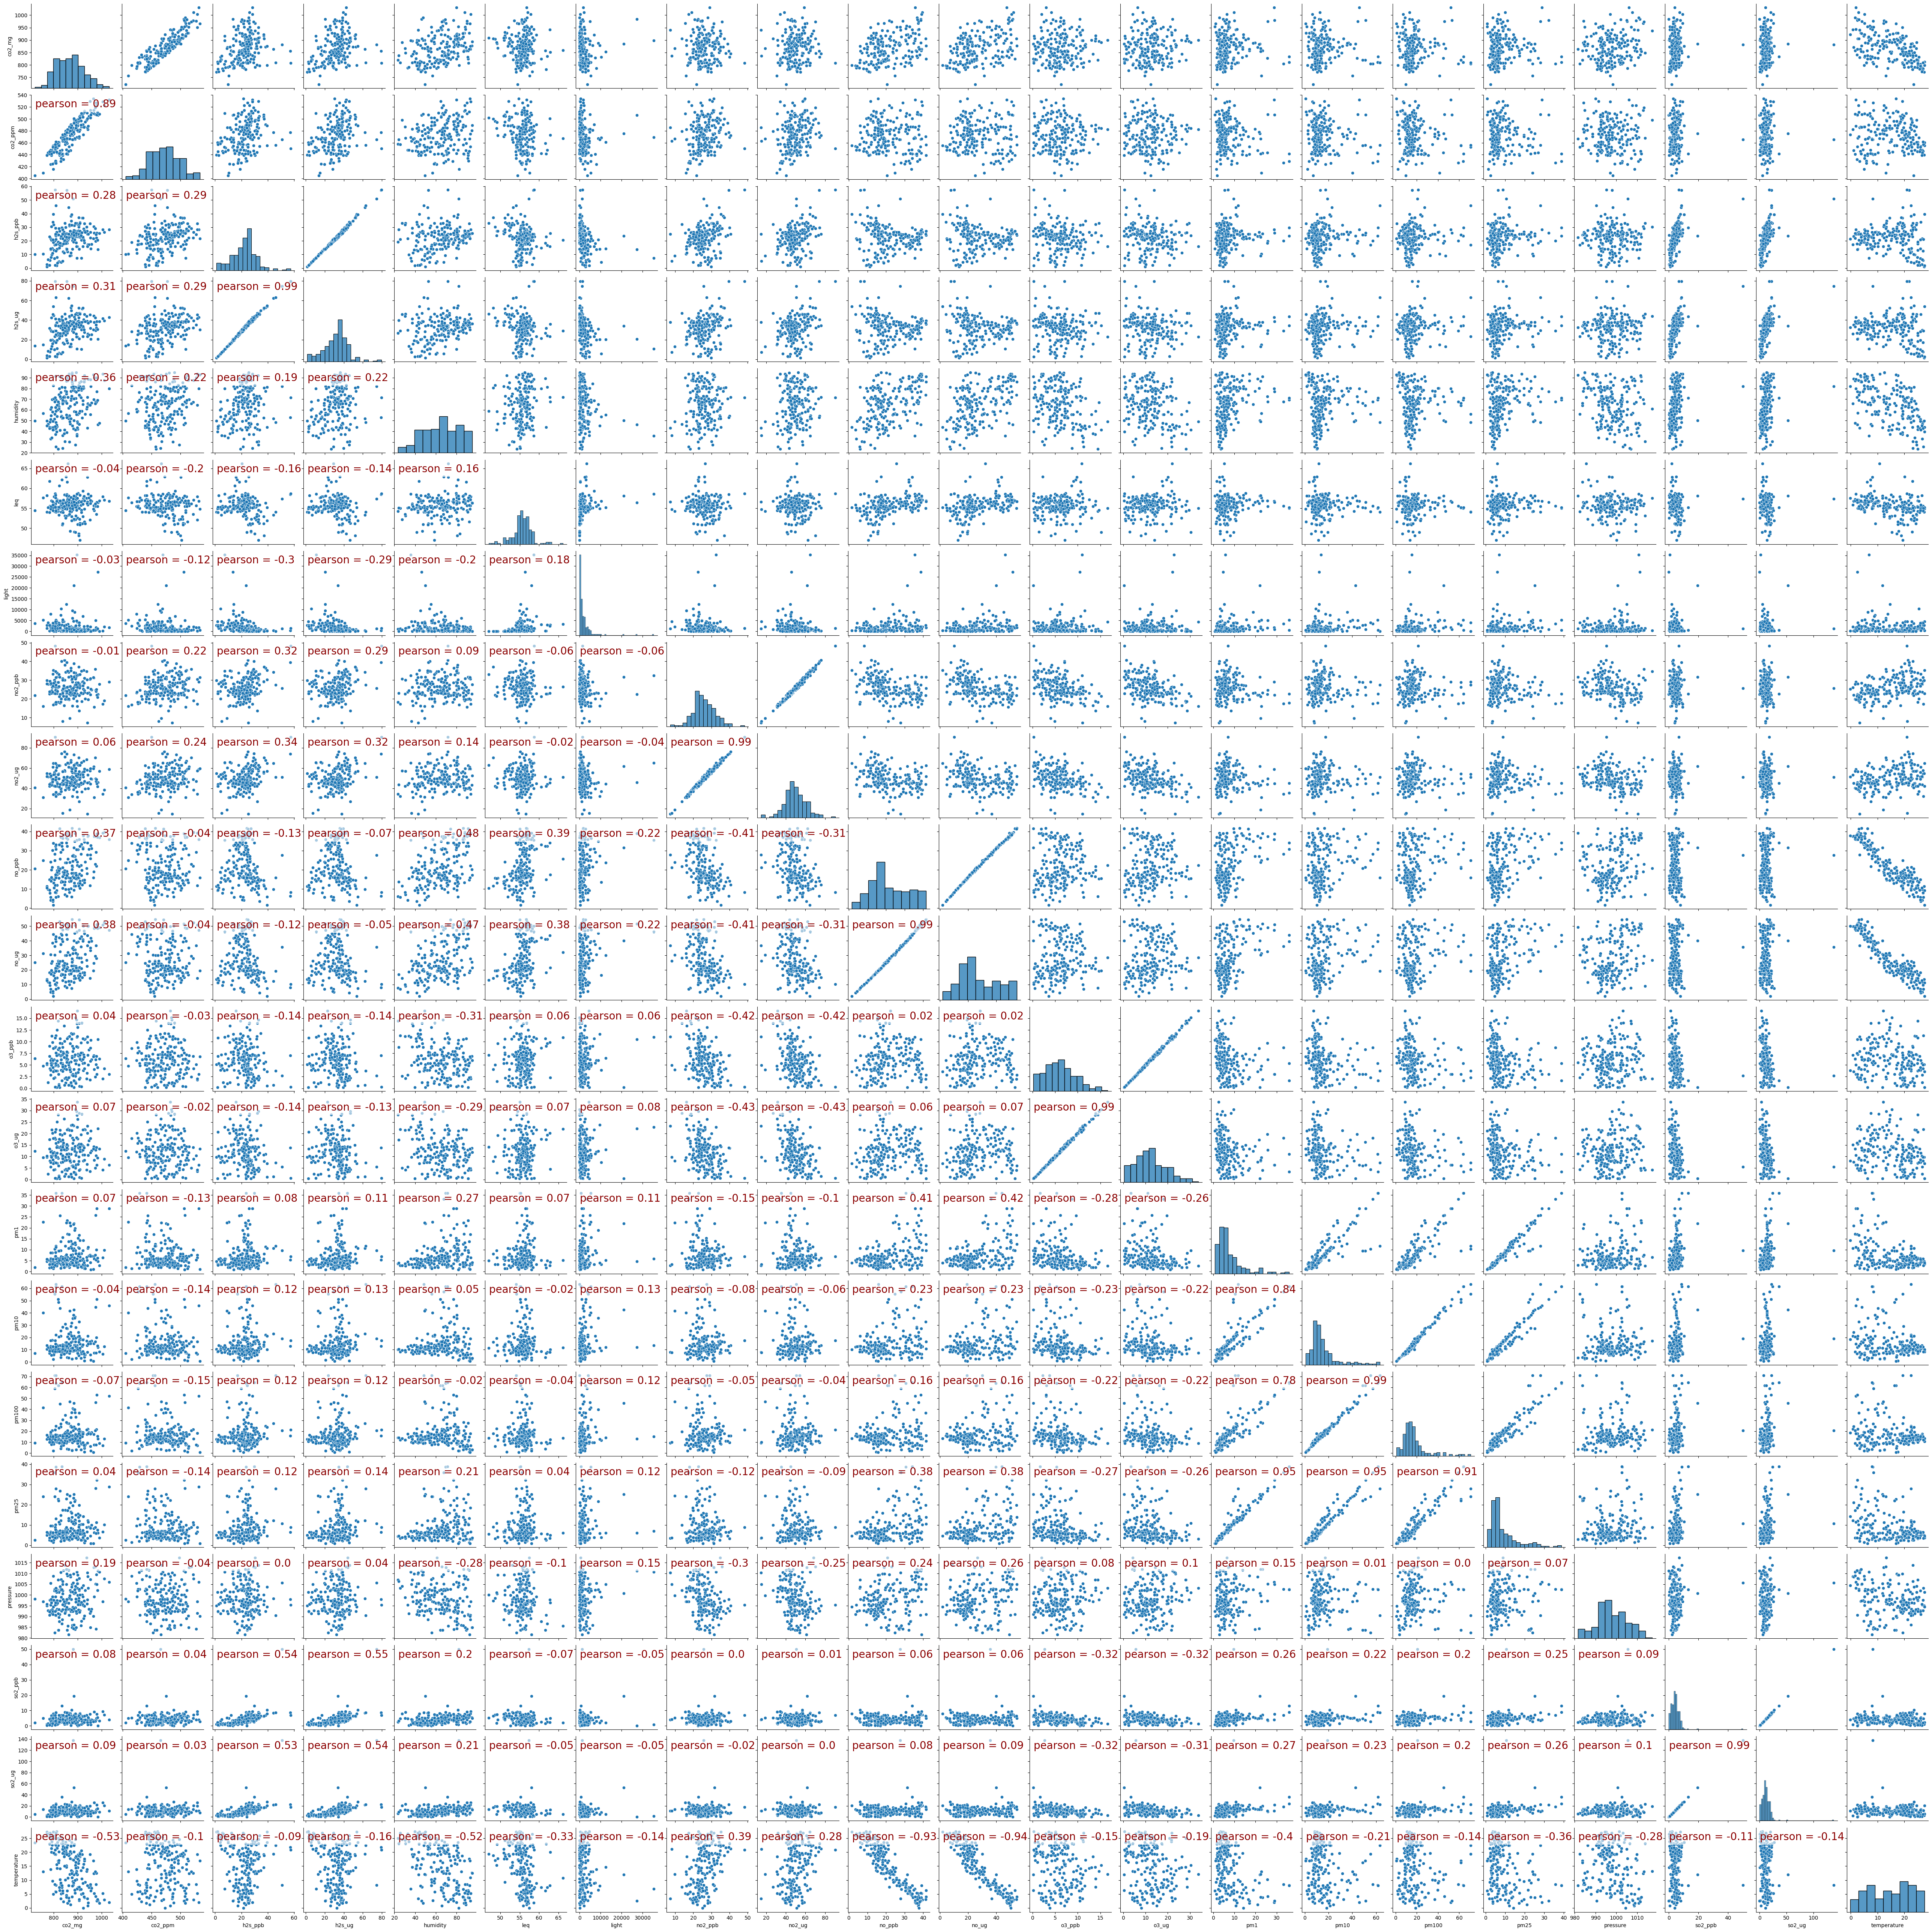

In [12]:
from scipy.stats import pearsonr
import math

def pearson(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    ax.annotate(f'pearson = {math.floor(100*pearsonr(x,y).statistic)/100}',xy=(.05, .95), xycoords=ax.transAxes, fontsize=20,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')


df = data[data.columns[2:]]
g = sns.pairplot(df.sample(200))
g.map_lower(pearson)

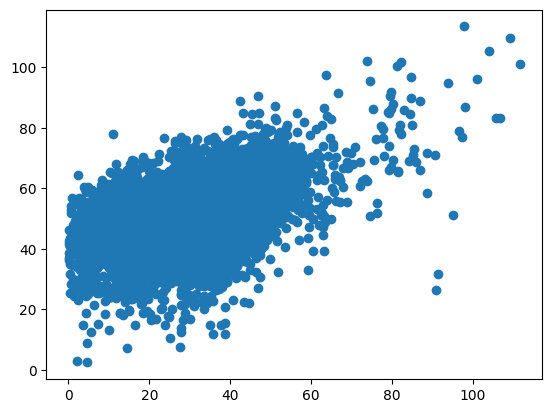

In [13]:
plt.scatter(df[['h2s_ug']], df[['no2_ug']])

## Linear regression

In [14]:
def MLS(x, y, x_h, y_h):  # Method of Least Squares
    enum_sum = 0
    denum_sum = 0
    for i in range(len(x)):
        dx = x[i] - x_h
        enum_sum += dx * (y[i] - y_h)
        denum_sum += dx * dx
    if (denum_sum != 0):
        beta1 = enum_sum / denum_sum
    beta0 = y_h - beta1 * x_h
    return beta1, beta0

def fit(x, b1, b0):
    ys = b1*x + b0
    return ys


## Hypothesys 2: Dependance of h2s and no2

In [15]:
import numpy as np

xs = np.array(df['h2s_ug'].to_list())
ys = np.array(df['no2_ug'].to_list())
print(xs)
print(ys)

[30.8762 32.1072 32.1065 ... 25.7455 24.4832 18.9702]
[43.4806 39.5821 46.6016 ... 52.3309 51.1951 48.2853]


In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=10)

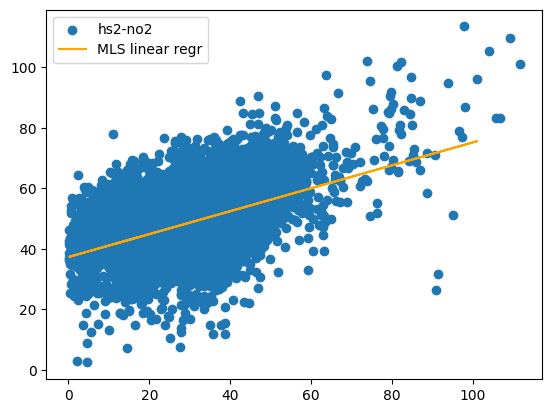

In [17]:
x_h = np.mean(X_train)
y_h = np.mean(y_train)
b1, b0 = MLS(xs, ys, x_h, y_h)

fig, ax = plt.subplots()
ax.scatter(xs, ys, label="hs2-no2")
y_p =  fit(X_test, b1, b0)
line, = ax.plot(X_test, y_p, label="MLS linear regr", color='orange')
plt.legend()
plt.show()

In [18]:
def r_squered(y_real, y_predicted):
    y_h = np.mean(y_real)
    diff = y_real - y_h
    tss = np.sum([d**2 for d in diff])
    diff = y_predicted - y_h
    rss = np.sum([d**2 for d in diff])
    R_s = tss/rss
    return R_s

print(r_squered(y_test, y_p))

5.411737660560793


In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_p))

0.20224497224685845


## Hypothesis 1: Dependance of co2 and day time

<Axes: xlabel='light', ylabel='no2_ug'>

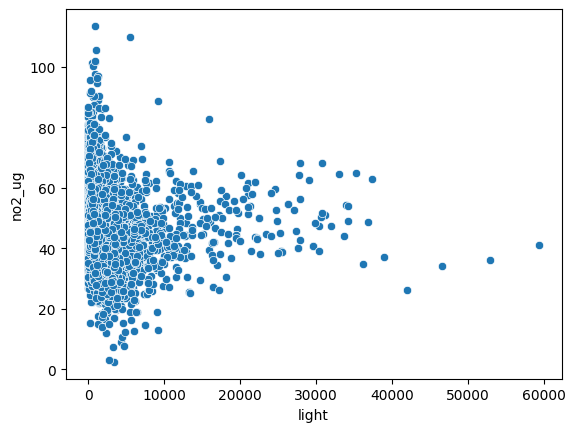

In [21]:
hyp1_data = data[['logged_at', 'light', 'no2_ug']]
sns.scatterplot(hyp1_data[['light', 'no2_ug']], x='light', y='no2_ug')

In [138]:
xs = np.array(hyp1_data['light'].to_list())
ys = np.array(hyp1_data['no2_ug'].to_list())

X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=10)
x_h = np.mean(xs)
y_h = np.mean(ys)

b1, b0 = MLS(X_train, y_train, x_h, y_h)

def fit(x, b1, b0):
    ys = b1*x + b0
    return ys

y_pred = fit(X_test, b1, b0)

print('Pearson coefitient: ', pearsonr(xs, ys).statistic)
print('R² score:', r2_score(y_test, y_pred))

Pearson coefitient:  -0.12886404443329172
R² score: 0.01679619622999795


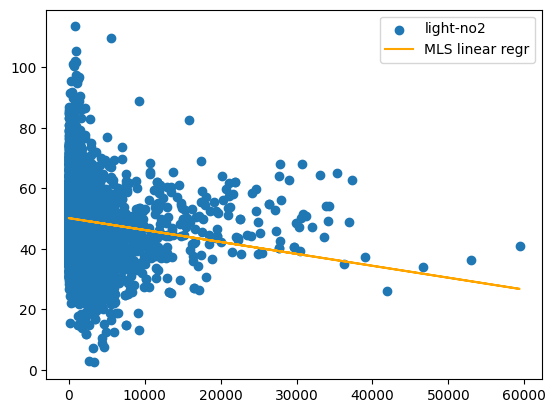

In [23]:
fig, ax = plt.subplots()
ax.scatter(xs, ys, label="light-no2")
y_p = fit(X_test, b1, b0)
line, = ax.plot(X_test, y_p, label="MLS linear regr", color='orange')
plt.legend()
plt.show()